<a href="https://colab.research.google.com/github/faheemkhaskheli9/Deep-Learning-Basic-Keras/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, AveragePooling2D, MaxPool2D, SpatialDropout2D
from keras.layers import Dropout,Dense,Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.__version__)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7010998994140411257
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3767918301304572821
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14386032756834821239
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18136080406315909984
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
1.14.0


In [ ]:
"/content/drive/My Drive/

In [ ]:
BASE_PATH = "/content/drive/My Drive/object recognition/CIFAR/"

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
train = unpickle(BASE_PATH+"train")
test = unpickle(BASE_PATH+"test")

In [ ]:
for k in train:
    print(k)
for k in test:
    print(k)

b'filenames'
b'batch_label'
b'fine_labels'
b'coarse_labels'
b'data'
b'filenames'
b'batch_label'
b'fine_labels'
b'coarse_labels'
b'data'


In [ ]:
train_data = train[b'data']
test_data = test[b'data']

In [ ]:
train_label = train[b'fine_labels']
test_label = test[b'fine_labels']

In [ ]:
print(train_label[:10])

[19, 29, 0, 11, 1, 86, 90, 28, 23, 31]


In [ ]:
def convert_CIFAR(data):
    d = []
    for i in data:
        R = i[0:1024].reshape(32,32)/255.0
        G = i[1024:2048].reshape(32,32)/255.0
        B = i[2048:].reshape(32,32)/255.0

        img = np.dstack((R,G,B))
        d.append(img)
    return d
train_data = convert_CIFAR(train_data)
test_data = convert_CIFAR(test_data)

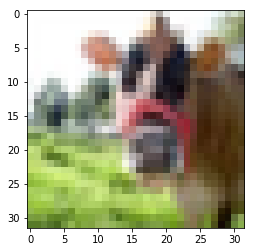

In [ ]:
plt.imshow(train_data[0])
plt.show()

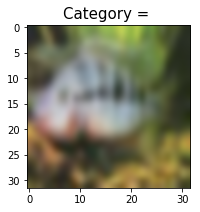

In [ ]:
def plot_CIFAR(ind):
    arr = train_data[ind]
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')
    ax.set_title('Category = ',fontsize =15)

plot_CIFAR(4)

In [ ]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [ ]:
print(np.min(np.array(train_data)))

0.0


In [ ]:
train_data  = np.array(train_data)
train_label = np.array(train_label)
test_data   = np.array(test_data)
test_label  = np.array(test_label)

In [ ]:
model = Sequential()
model.add(Convolution2D(200,(10,10)))
model.add(SpatialDropout2D(0.2))
model.add(Flatten())
model.add(Dense(300,activation = 'sigmoid'))
model.add(Dense(100,activation = 'softmax'))

from keras.optimizers import Adam

model.compile(optimizer=Adam(0.0001, beta_1 = 0.1),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
import gc
gc.collect()

201

In [ ]:
model.fit(train_data, train_label, epochs= 100, verbose=1, batch_size=50, shuffle = True, validation_data=(test_data, test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 64s 1ms/step - loss: 3.9913 - acc: 0.1162 - val_loss: 3.8382 - val_acc: 0.1450
Epoch 2/100
50000/50000 [==============================] - 62s 1ms/step - loss: 3.7018 - acc: 0.1657 - val_loss: 3.6968 - val_acc: 0.1645
Epoch 3/100
50000/50000 [==============================] - 62s 1ms/step - loss: 3.5878 - acc: 0.1839 - val_loss: 3.6133 - val_acc: 0.1804
Epoch 4/100
50000/50000 [==============================] - 62s 1ms/step - loss: 3.5018 - acc: 0.1990 - val_loss: 3.5605 - val_acc: 0.1850
Epoch 5/100
50000/50000 [==============================] - 62s 1ms/step - loss: 3.4300 - acc: 0.2127 - val_loss: 3.5141 - val_acc: 0.1943
Epoch 6/100
50000/50000 [==============================] - 62s 1ms/step - loss: 3.3739 - acc: 0.2217 - val_loss: 3.4809 - val_acc: 0.1999
Epoch 7/100
50000/50000 [==============================] - 62s 1ms/step - loss: 3.3229 - acc: 0.2322 - val_loss: 3.4450 - 